# Laboratorio 3 Numpy, Pandas, Matplotlib

## Parte1

In [2]:
import numpy as np

In [3]:
# ¿Cuál es el tamaño en bytes de un array de 1000
# elementos de tipo booleano?
# Crear un array de 1000 elementos de tipo booleano
arr = np.zeros(1000, dtype=bool)

# Obtener el tamaño en bytes del array
size_bytes = arr.nbytes

# Imprimir el tamaño en bytes
print("El tamaño en bytes del array es:", size_bytes)

El tamaño en bytes del array es: 1000


In [4]:
#Cree un array cuyos elementos sean los enteros pares en
#[1,100] y en orden decreciente. Muestre los 10 últimos
#por pantalla.
# Crear un array con los enteros pares en [1,100] en orden decreciente
arr = np.arange(2, 101, 2)[::-1]

# Imprimir el array resultante
print(arr[-10:])

[20 18 16 14 12 10  8  6  4  2]


In [5]:
# 3
arr3 = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
print(arr3[1])
print(arr3[[0,2]][:,[0,2]])
# Para seleccionar los elementos 1 y 3 de las filas 1 y 3 ocupamos slicing de la 
#siguiente manera:
# arr3[ [fila1, fila3]   ][ :, [columna1, columna3 ]] los dos puntos significan toda la fila

[0 3 7 4]
[[2 5]
 [8 5]]


In [6]:
#4 Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],
# obtenga la media aritmética de la diferencia (a-b).
arra = np.array([1,4,2,7])
arrb = np.array([1,3,2,9])
arrc = arra - arrb
print(np.mean(arrc))

-0.25


In [7]:
# 5 Tengo valores de cordenadas (x, y) en las columnas del array
arr5 = np.array([[1.33 ,4.5],
[30.0 ,10.7],
[70.2 ,0.5]])
arr5 = np.append(arr5, [[37.1, -3.6]], axis=0)
print(np.shape(arr5))

(4, 2)


In [8]:
#6 
arr5 = arr5.T
print(arr5)
arr5 = np.append(arr5, [[10.8, 3.0, 35.8, 12.0]], axis=0)
arr5

[[ 1.33 30.   70.2  37.1 ]
 [ 4.5  10.7   0.5  -3.6 ]]


array([[ 1.33, 30.  , 70.2 , 37.1 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ],
       [10.8 ,  3.  , 35.8 , 12.  ]])

## Parte 2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('NucleosPoblacion.csv')
print(df.head())

   FID  OBJECTID     Texto  Poblacion  CodMun Municipio  CodProvin  \
0    0         1   Agüimes    29431.0   35002   Agüimes         35   
1    1         2   Antigua    10458.0   35003   Antigua         35   
2    2         3  Arrecife    58156.0   35004  Arrecife         35   
3    3         4    Arucas    36745.0   35006    Arucas         35   
4    4         5    Gáldar    24473.0   35009    Gáldar         35   

    Provincia          X          Y  
0  Las Palmas -15.446012  27.900542  
1  Las Palmas -14.013301  28.418966  
2  Las Palmas -13.551451  28.960649  
3  Las Palmas -15.521512  28.117496  
4  Las Palmas -15.654111  28.143873  


### ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [11]:
df.query('Poblacion >100000')['Municipio'].nunique()

62

### 2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
### a. ¿Cuál es la segunda ciudad más poblada?
### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

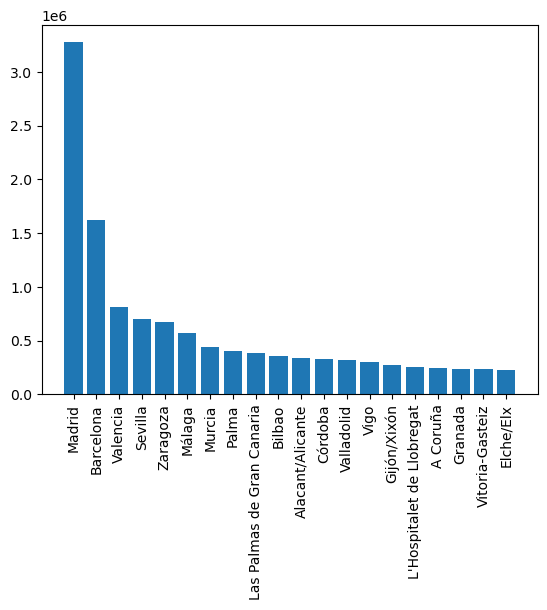

In [12]:
df_sorted = df.sort_values(by= 'Poblacion', ascending=False)
fig,ax = plt.subplots()
ax.bar(df_sorted['Texto'][:20], df_sorted['Poblacion'][:20])
plt.xticks(rotation=90)
plt.show()

### La segunda ciudad mas poblada es Barcelona, Granada es la 18ava mas poblada

### 3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [13]:
df.query('Provincia == "Extremadura" and Poblacion > 5000')['Texto'].nunique()

0

### Tambien se reviso el archivo csv y se confirma que no existe Extremadura

### ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población

In [15]:
max_lat = df['Y'].max()
Municipio_Norte = df.loc[df['Y'] == max_lat, 'Municipio'].iloc[0]
Municipio_Norte

'Viveiro'

### Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [16]:
df2 = df.loc[df['Provincia'] == 'Granada', ('Municipio','Poblacion')]
Med = df2['Poblacion'].mean()
Max = df2['Poblacion'].max()
Min = df2['Poblacion'].min()
Std = df2['Poblacion'].std()
Medi = df2['Poblacion'].median()
print(f'La Media es {Med}, valor Maximo: {Max}, valor minimo: {Min}, desviacion estandar:{Std} y mediana:{Medi}')


La Media es 30217.85, valor Maximo: 239154.0, valor minimo: 10386.0, desviacion estandar:50355.49171459277 y mediana:17526.0


### Realice un histograma con la población de los Municipios para cada una de las provincias.

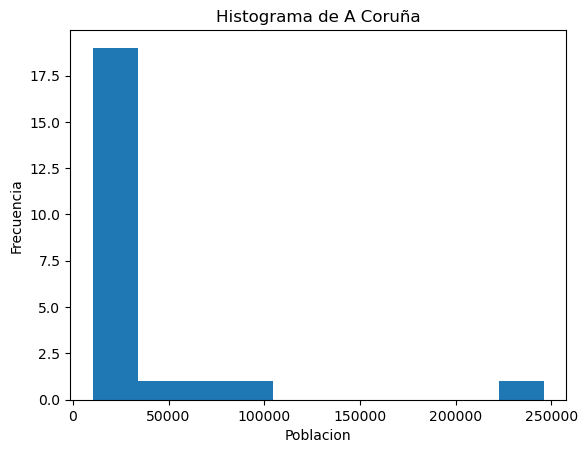

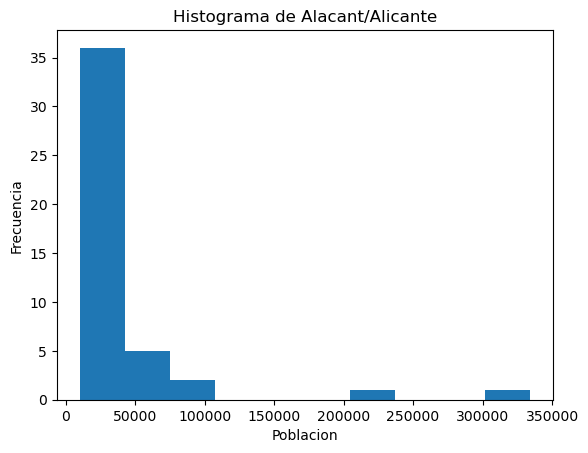

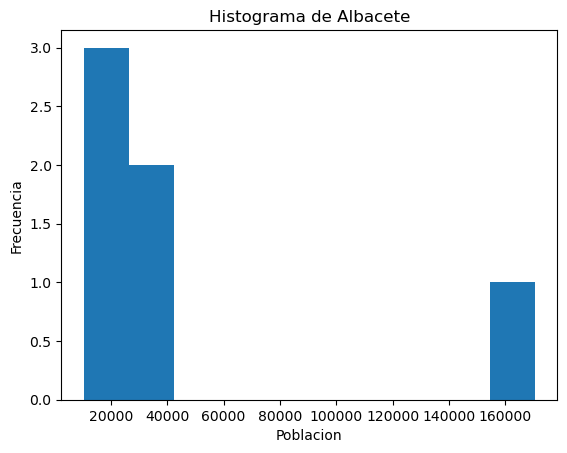

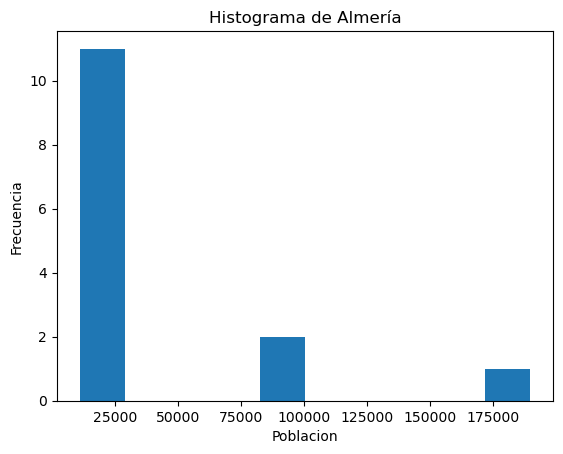

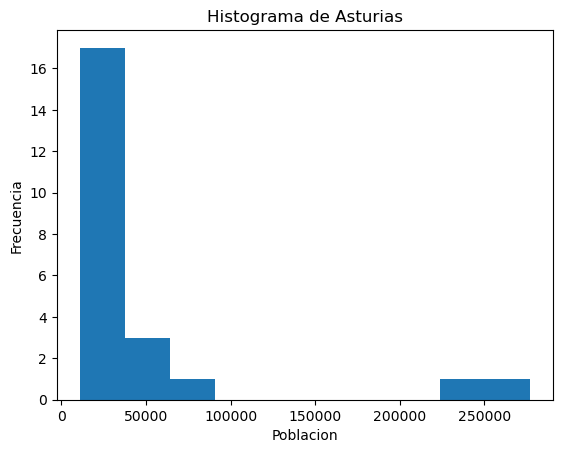

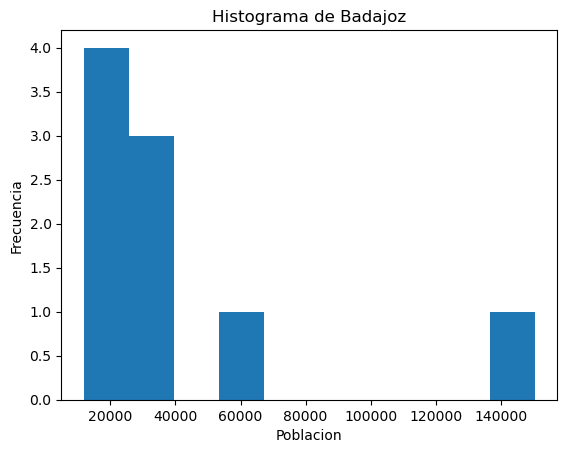

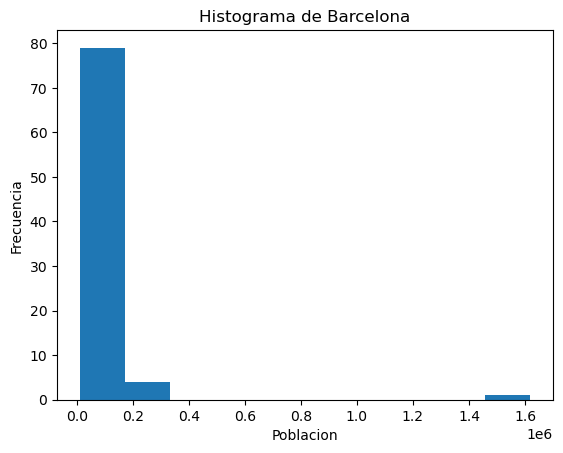

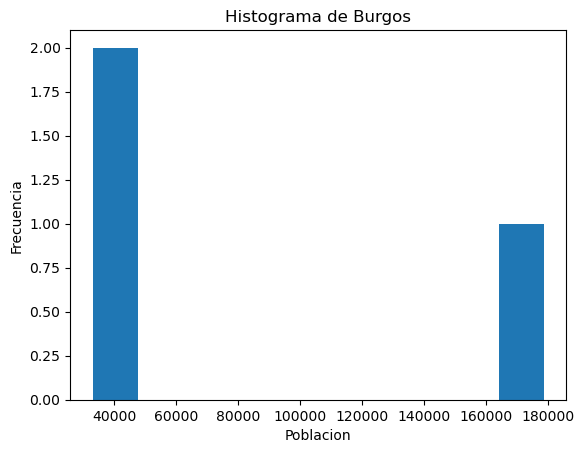

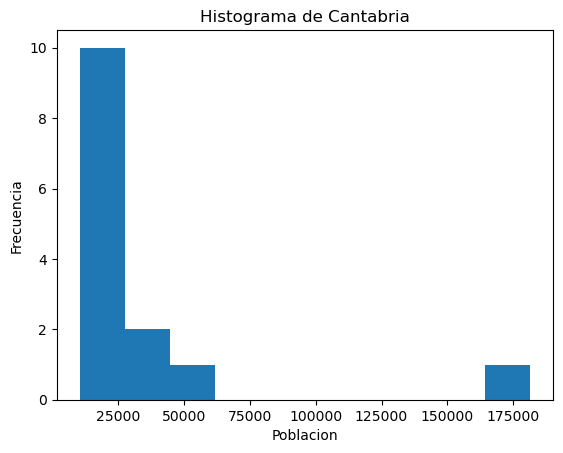

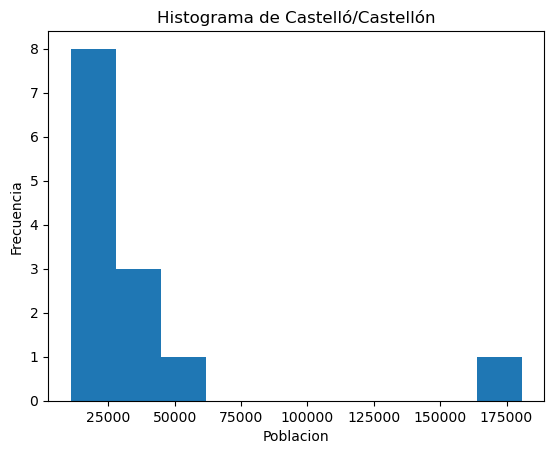

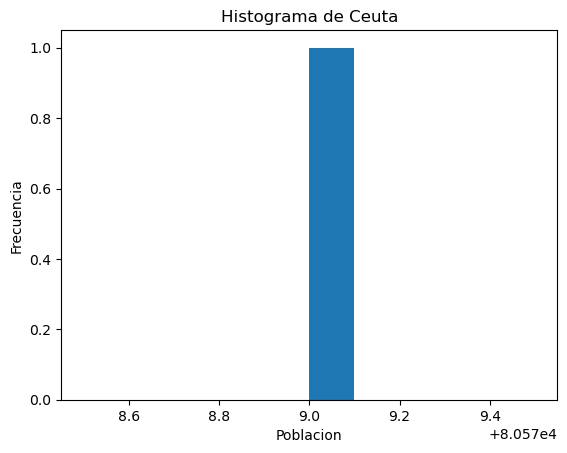

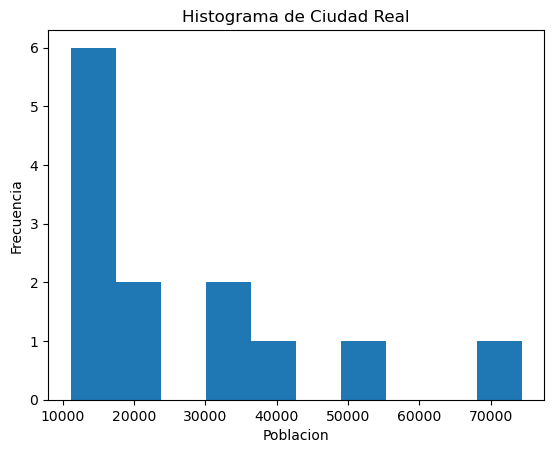

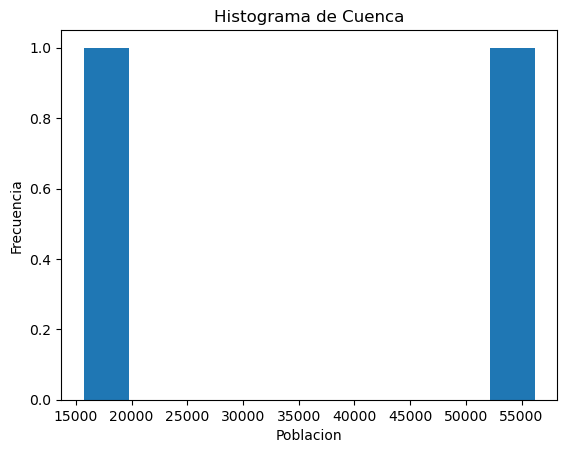

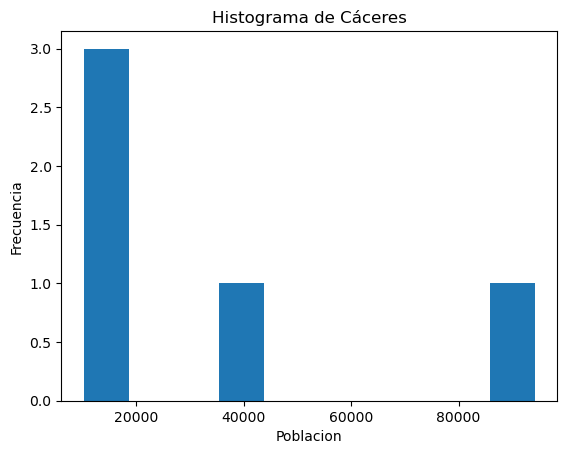

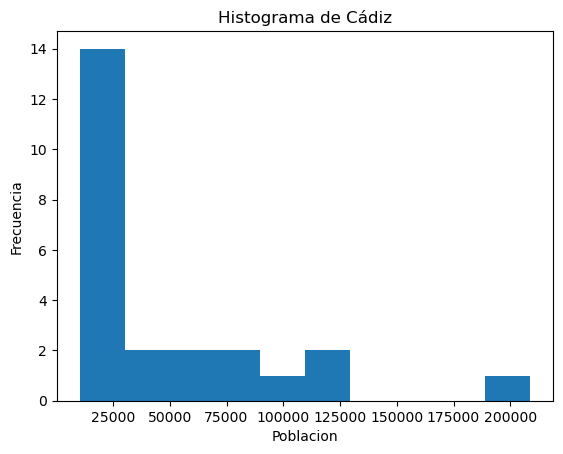

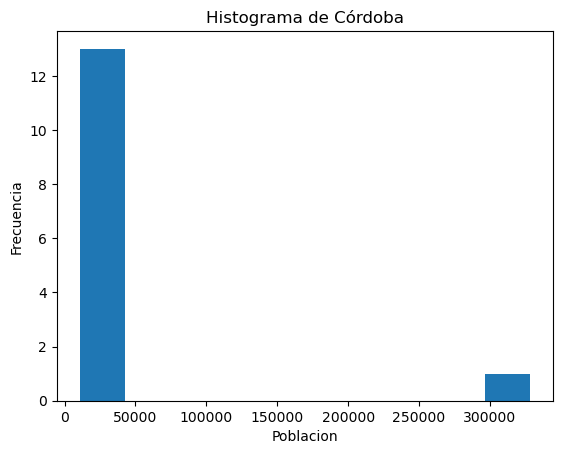

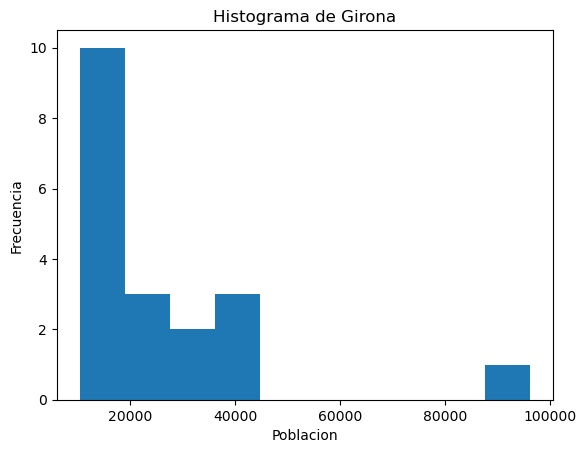

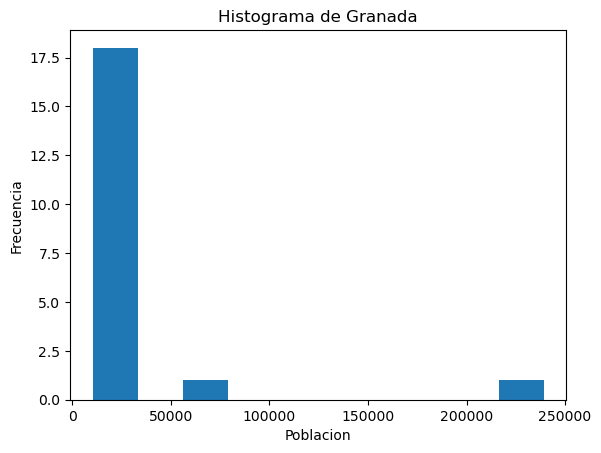

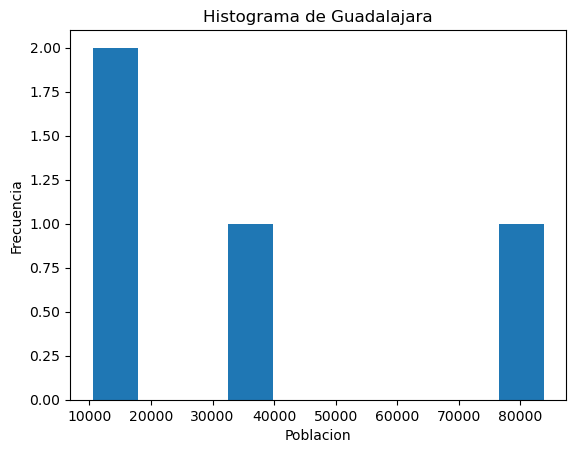

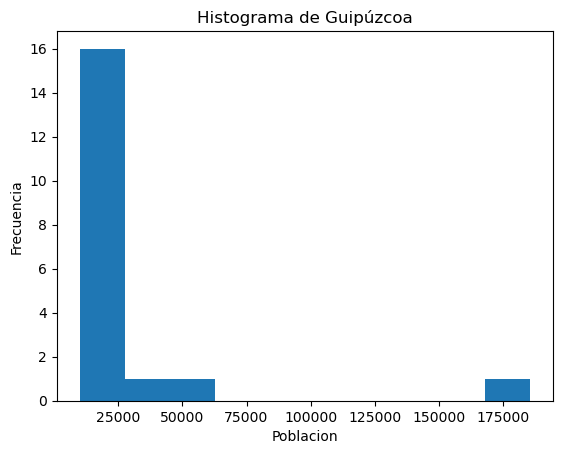

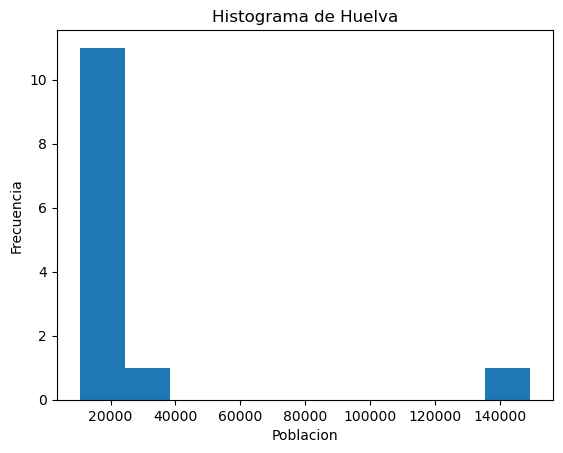

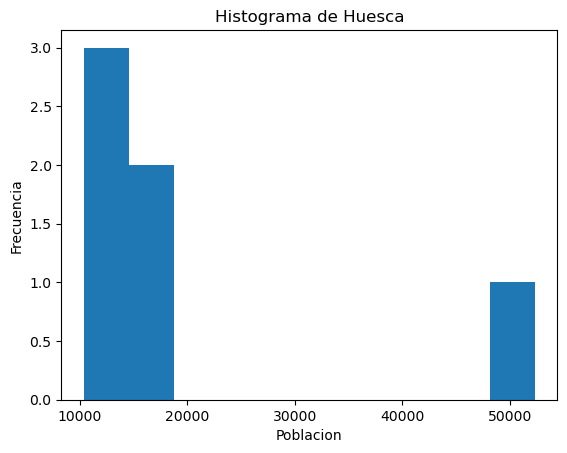

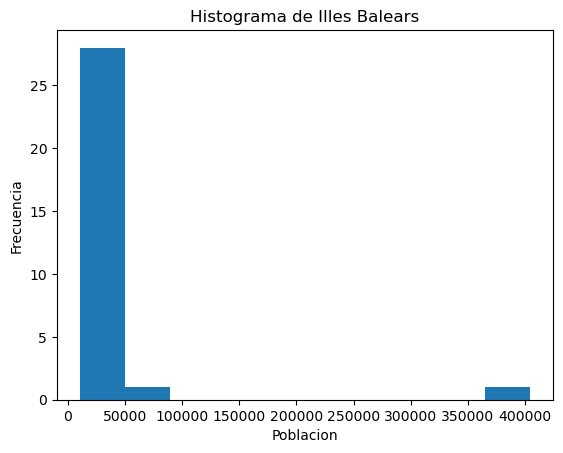

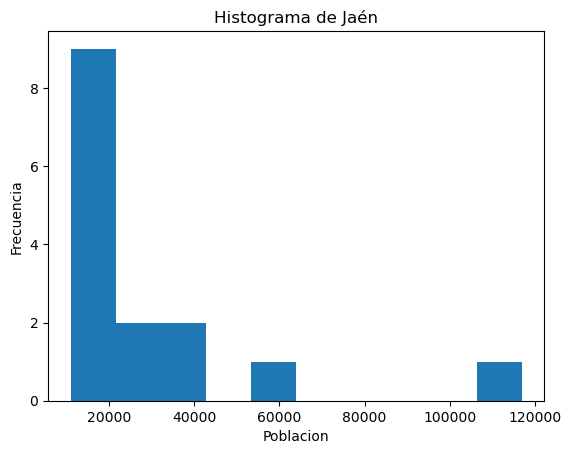

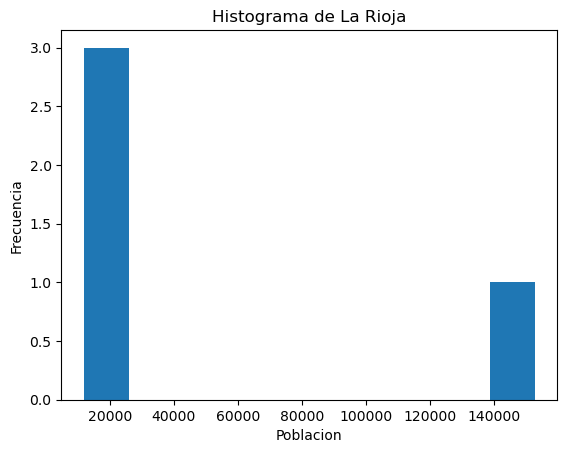

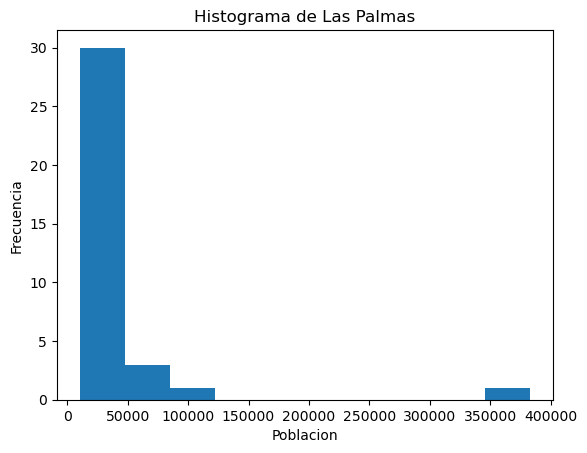

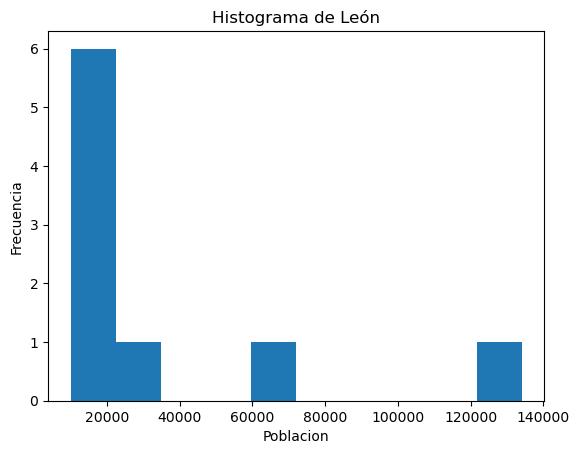

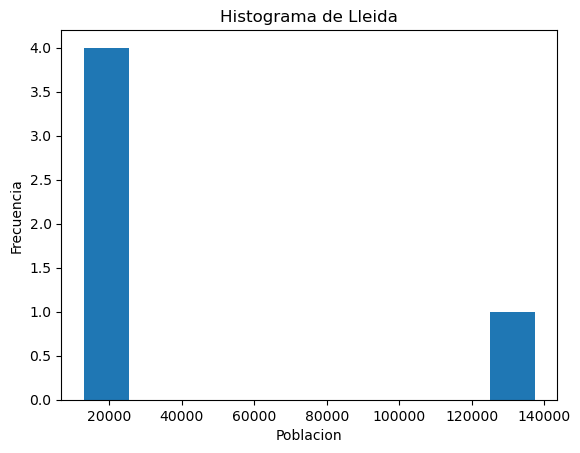

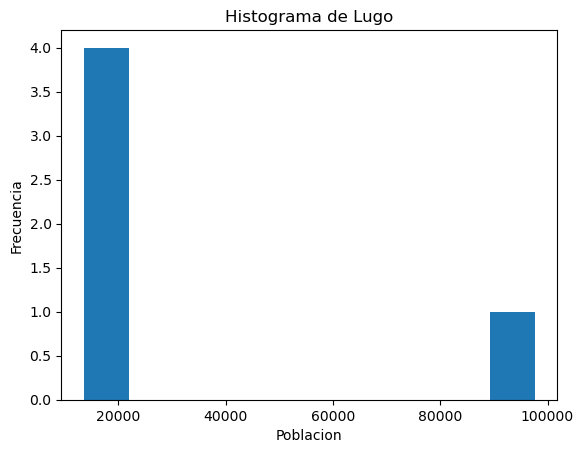

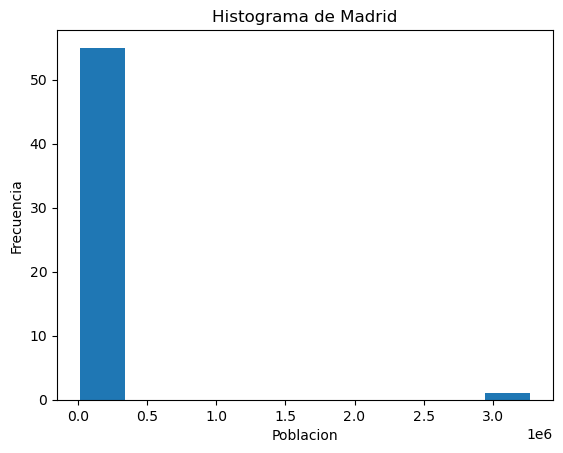

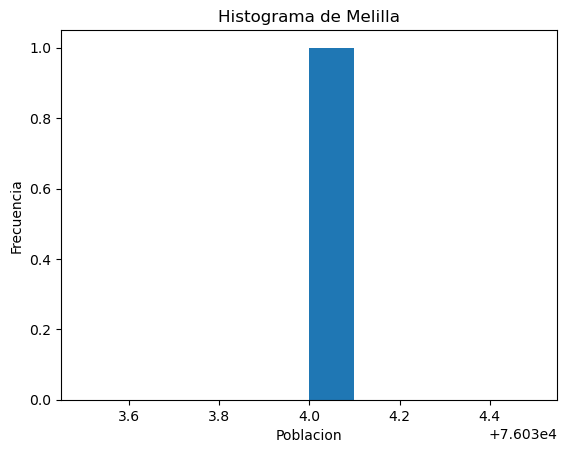

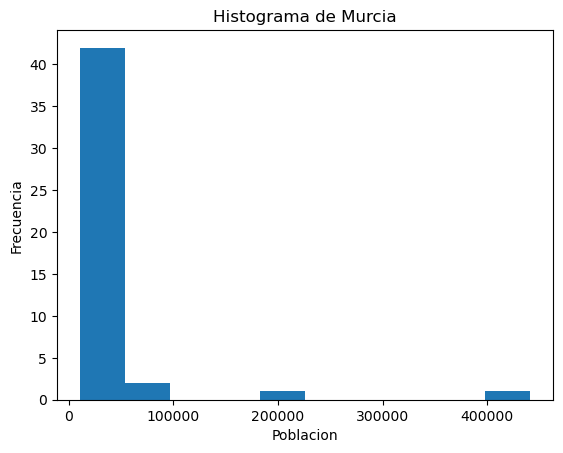

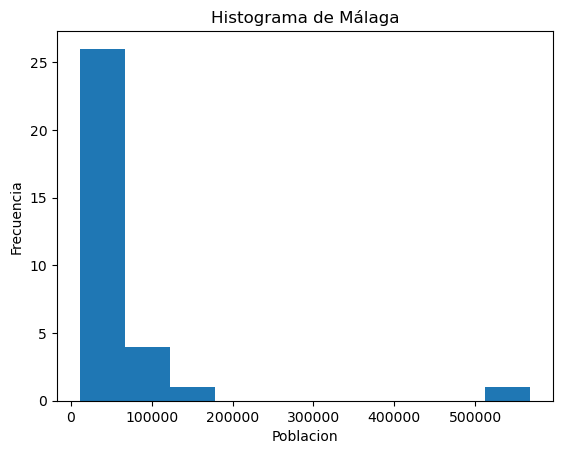

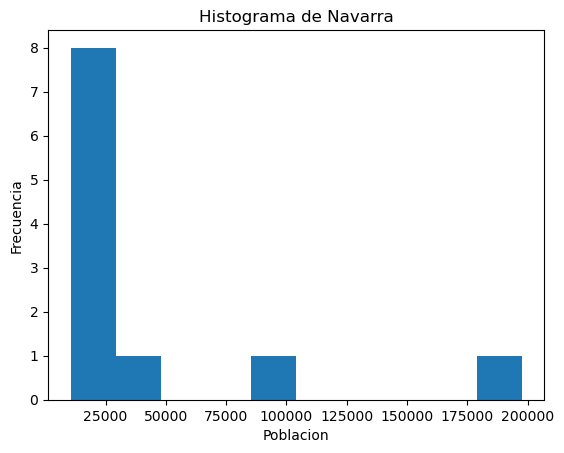

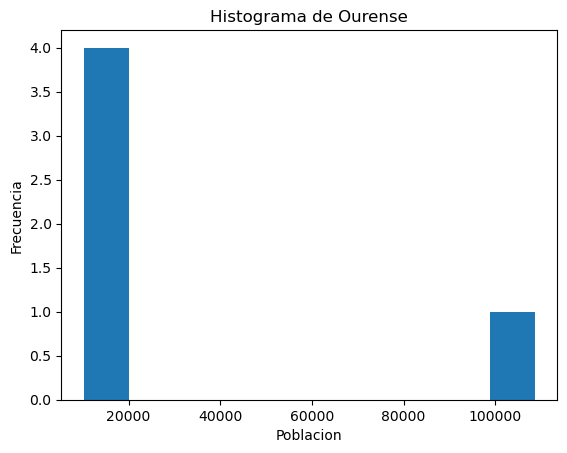

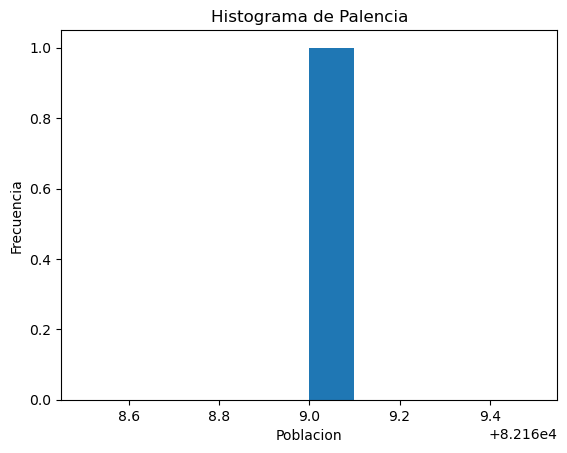

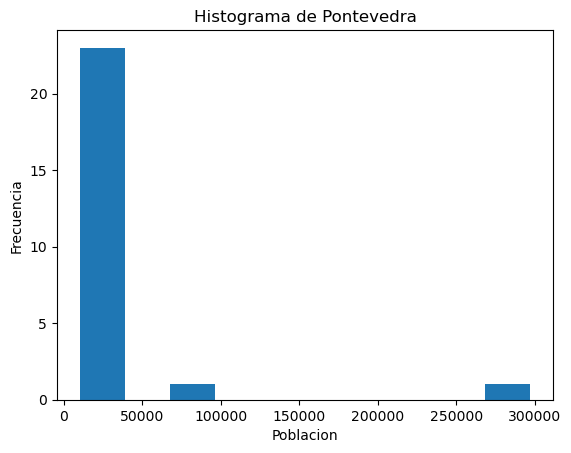

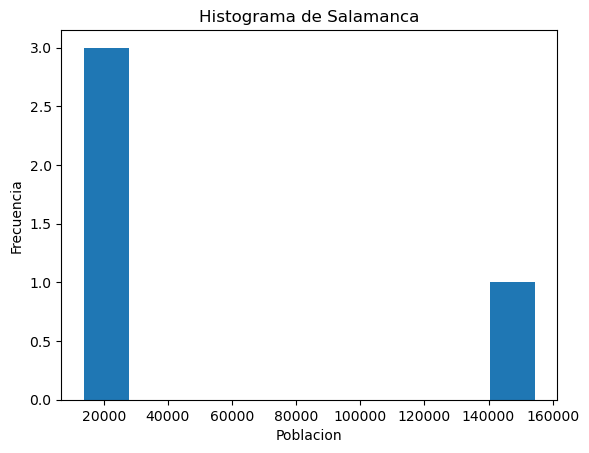

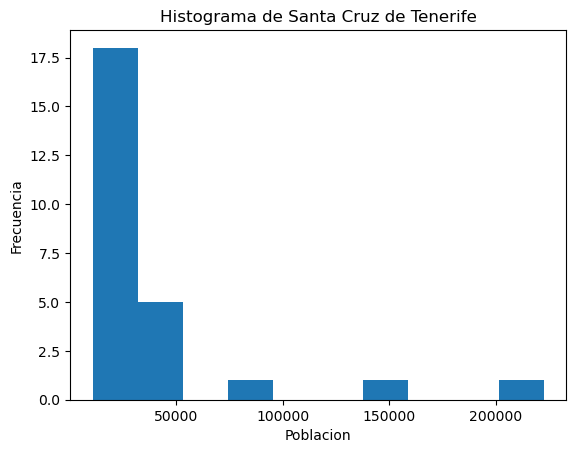

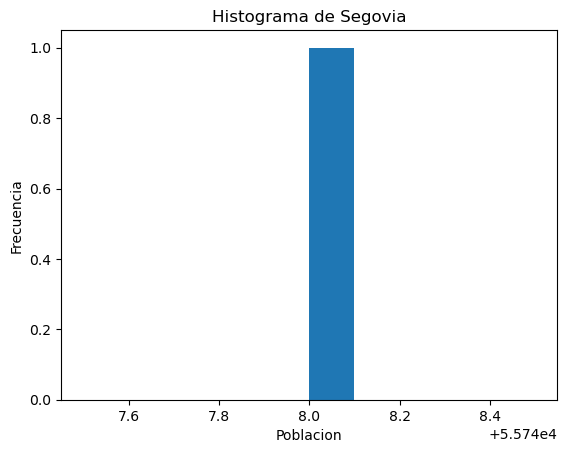

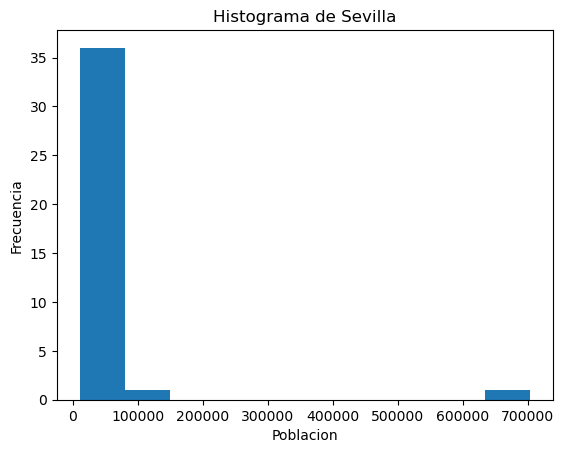

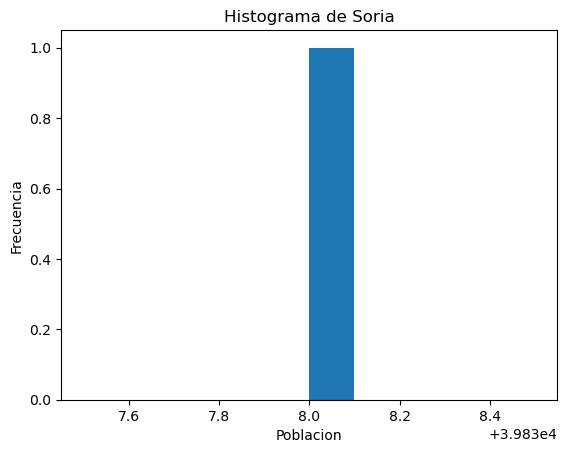

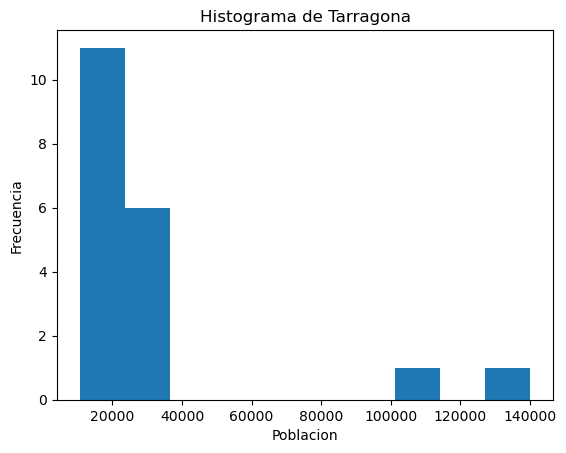

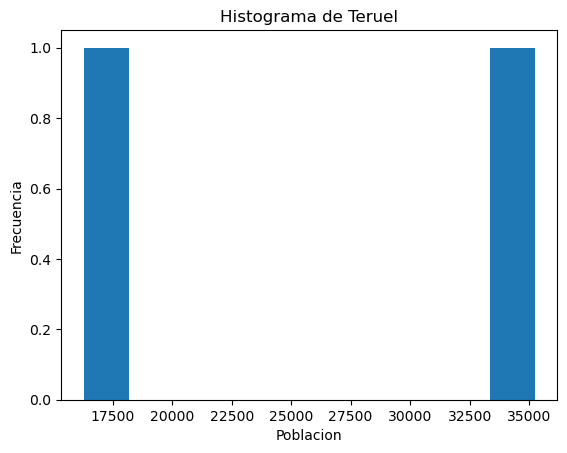

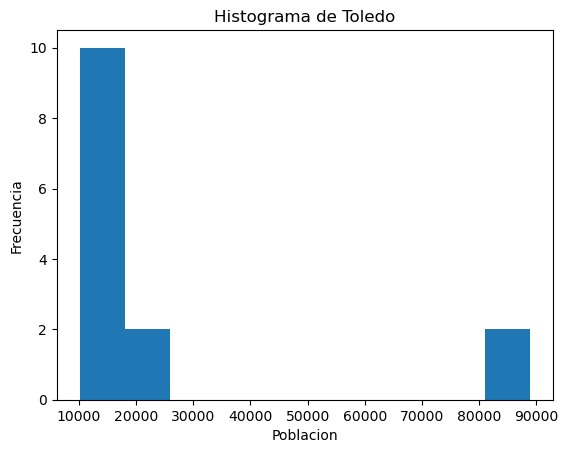

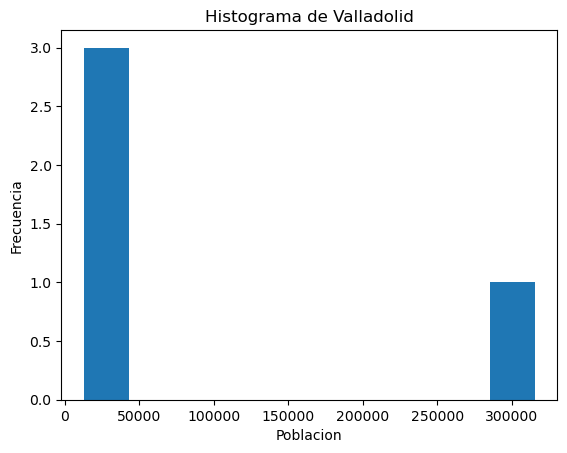

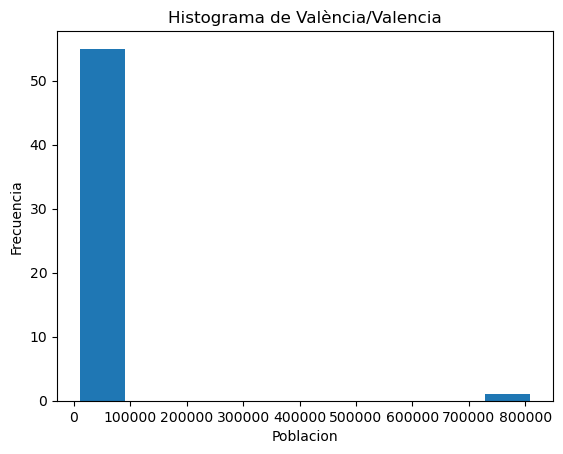

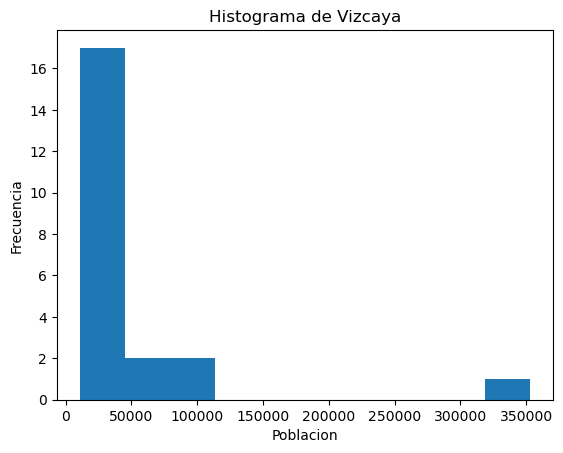

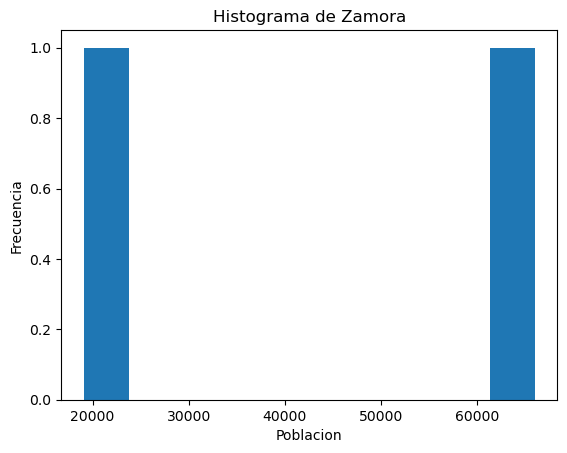

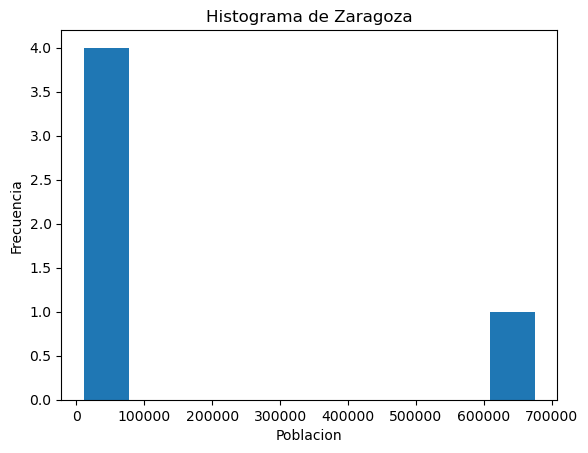

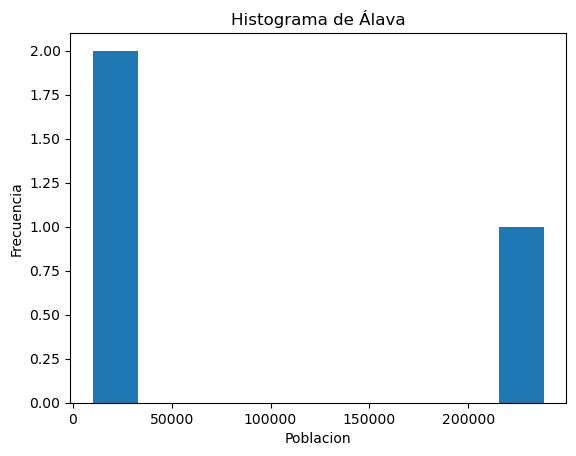

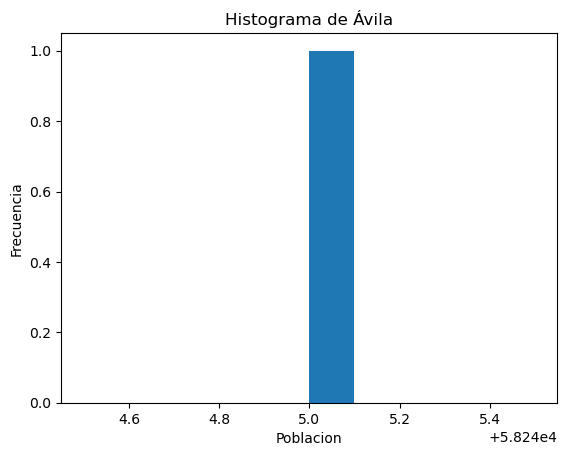

In [17]:
grouped = df.groupby('Provincia')
grouped.head()
for name, group in grouped:
    plt.hist(group['Poblacion'],bins=10)
    plt.title(f'Histograma de {name}')
    plt.xlabel('Poblacion')
    plt.ylabel('Frecuencia')
    plt.show()



### Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [18]:
arr4 = df['Municipio'].unique()
print(type(arr4))
arr5 = np.empty(50)
arr6 = np.empty(50,dtype = '<U50')
vector_aleatorio = np.random.randint(low = 1, high=arr4.shape, size =50)
i = 0
for n in vector_aleatorio:
    arr6[i] = arr4[n]
    arr5[i] = df.loc[df['Municipio'] == arr4[n]]['Poblacion'].sum()
    i = i+1

df3 = pd.DataFrame({'Municipio': arr6,'Poblacion':arr5})
#Ocupe este codigo para comprobar que tenia los valores totales de poblacion correctos para los municipios, algunos tenian mas de 1 ciudad
print(df3.head())
print(df.loc[df['Municipio'] == df3['Municipio'][0]])
Media = df3['Poblacion'].mean()
STD = df3['Poblacion'].std()
print(f'El promedio de los 50 municipios es {Media}, la desviacion estandar es {STD}')

<class 'numpy.ndarray'>
           Municipio  Poblacion
0               Lepe    26763.0
1              Chiva    14539.0
2           Azkoitia    11351.0
3  Torrejón de Ardoz   118441.0
4          San Roque    29588.0
    FID  OBJECTID Texto  Poblacion  CodMun Municipio  CodProvin Provincia  \
91   91        92  Lepe    26763.0   21044      Lepe         21    Huelva   

           X          Y  
91 -7.203412  37.255152  
El promedio de los 50 municipios es 53012.42, la desviacion estandar es 119855.69027096797
